In [ ]:
import os
os._exit(00)

In [1]:
import sys
sys.path.insert(0, '../CAFE')
sys.path.insert(0, '../CRETA')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

import creta
import cafe_io
from cafe_io import *
import cafe_helper
from cafe_helper import *
import cafe

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

User API Created


In [2]:
# SPECTRAL EXTRACTION

In [3]:
# Read parameter file with extraction keywords
creta_dir = '../CRETA/'
pf = open(creta_dir+'param_files/IIZw096_single_params.txt','r')
print(pf.read())
pf.close()

cubes = ch1-short, ch1-medium, ch1-long, ch2-short, ch2-medium, ch2-long, ch3-short, ch3-medium, ch3-long, ch4-short, ch4-medium, ch4-long
user_r_ap = 0.3                 # [arcsec] Aperture size
user_ra = 20h57m24.368s         # RA of the extraction location
user_dec = 17d07m39.21s         # Dec of the extraction location
point_source = False            # [True/False] True = Cone extraction. False = Cylinder extraction
lambda_ap = 5.4                 # [microns] The user-specified aperture size (user_r_ap) will be defined at this wavelength (ignored if point_source=False; cylinder extraction)
aperture_correction = False     # [True/False]
centering = True                # [True/False] At lambda_cent, this will update user_ra,user_dec to recenter the extraction location  
lambda_cent = 5.4               # [microns] The wavelength at which to perform the centering (ignored if centering=False)
background_sub = False          # [True/False]
r_ann_in = 0.0                  # [arcsec] When 

In [4]:
# Load the extraction tool (CRETA)
c = creta.creta(creta_dir)

CAFE Region Extraction Tool Automaton (CRETA) initialized


In [5]:
# Perform the extraction
c.singleExtraction(parameter_file=True, parfile_name='IIZw096_single_params.txt', data_path='../CRETA/data/IIZw096/', output_filebase_name='IIZw096')

User API Created
PSFs: ../CRETA/PSFs/
Data: ../CRETA/data/IIZw096/
########################################
     Load User Parameters 
########################################
Cubes: ['ch1-short', 'ch1-medium', 'ch1-long', 'ch2-short', 'ch2-medium', 'ch2-long', 'ch3-short', 'ch3-medium', 'ch3-long', 'ch4-short', 'ch4-medium', 'ch4-long']
Aperture radii: [0.3] (arcsec)
RA,δ: [314.35153333,17.12755833] (degrees)
Point Source: False
Aperture Correction: False (PSF Correction)
Centering: True
Centering lambda: 5.4μm
Background Subtraction: False
PSF sub-cubes Path: ../CRETA/PSFs/
Data sub-cubes Path: ../CRETA/data/IIZw096/
########################################
Loading Data
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch1-short_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch1-medium_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch1-long_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch2-short_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcub

Centering around 5.399600082746474 um in cube ch1_SHORT
Old coordinates were: 314.35153333 17.12755833
New coordinates are: <SkyCoord (ICRS): (ra, dec) in deg
    (314.35153333, 17.12755833)>
ch1_SHORT photometry exectued in: 0.9436099529266357 seconds
ch1_MEDIUM photometry exectued in: 1.0744340419769287 seconds
ch1_LONG photometry exectued in: 1.2612688541412354 seconds
ch2_SHORT photometry exectued in: 0.849987268447876 seconds
ch2_MEDIUM photometry exectued in: 0.9946591854095459 seconds
ch2_LONG photometry exectued in: 1.1587319374084473 seconds
ch3_SHORT photometry exectued in: 0.6960749626159668 seconds
ch3_MEDIUM photometry exectued in: 0.7777988910675049 seconds
ch3_LONG photometry exectued in: 0.8984119892120361 seconds
ch4_SHORT photometry exectued in: 0.47434306144714355 seconds
ch4_MEDIUM photometry exectued in: 0.5514171123504639 seconds
ch4_LONG photometry exectued in: 0.5387790203094482 seconds
Photometry exectued in': 10.254150152206421 seconds
Initiating stitching pro

In [6]:
# CAFE FITTING

In [2]:
# Setup directories
source_fd = '../CRETA/extractions/'
source_fn = 'IIZw096_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')

cafe_dir = '../CAFE/'
inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_miri_IIZw096.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

z=0.03637

In [3]:
s = cafe.specmod(cafe_dir)

In [4]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Load data: ../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
Filename: ../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (11532,)   float64   
  2  ERR           1 ImageHDU         7   (11532,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (11532,)   float64   
  4  ERR_ST        1 ImageHDU         7   (11532,)   float64   
  5  DQ            1 ImageHDU         7   (11532,)   float64   
  6  WAVE          1 ImageHDU         7   (11532,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   11532R x 1C   [20A]   


Generating continuum profiles for guess model
Parameter object has 37 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
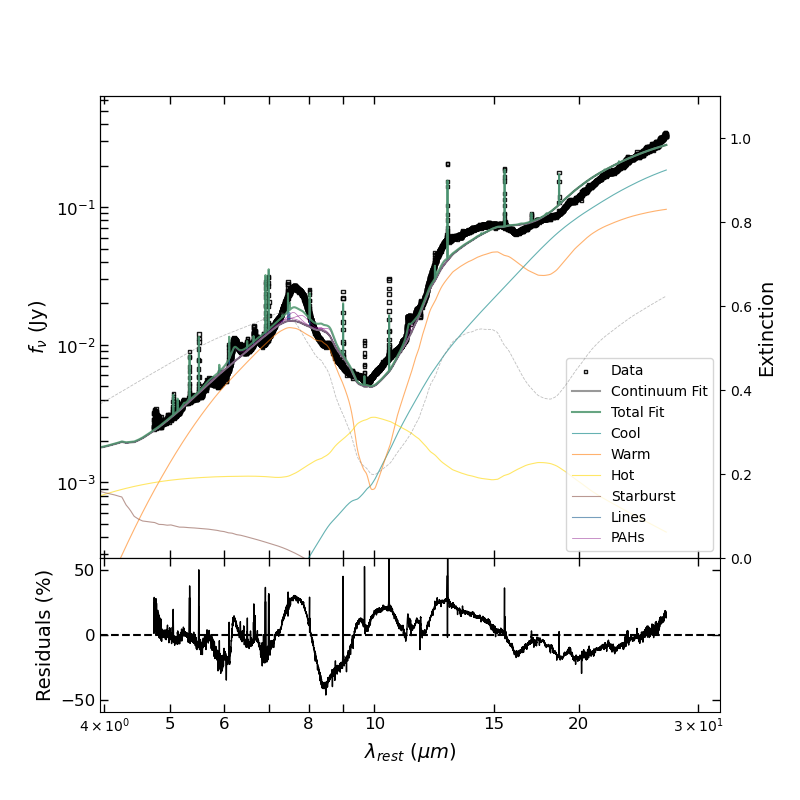

In [6]:
s.plot_spec_ini(inppar_fn, optpar_fn)

In [7]:
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter object
Parameter object has 37 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
2.25 seconds to make continnum profiles
Generating parameter cube
Fitting 229 parameters
Iteration 1/5(max): 2023-01-09 16:43:43.568857 -----------------
True in 30 steps
54.72 seconds elapsed
<Parameter 'STB_FLX', value=5.296833019954541e-07 +/- 0.92, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Parameter 'g_FeII_50624N_Peak', value=6.6044857074341066e-24 +/- 0.00179, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'g_Humphreys96_59066N_Peak', value=7.45746870234402e-20 +/- 0.0053, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'g_Pfund65_74578B_Gamma', value=0.006671100309694224 +/- 0.00113, bounds=[0.00026406733481945227:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Parameter 'g_ArV_79016N_Peak', value=6.102444756830416e-22 +/- 0.00337, bounds=[0.0:inf]> at lower bound, fixing to 0.

In [8]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-0.18866087207349322
-6.292890996447405e-07


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


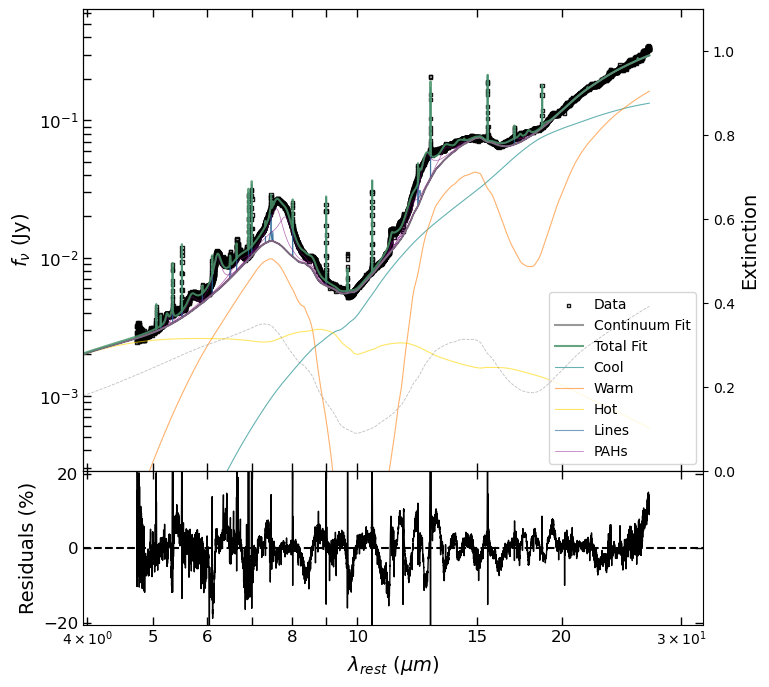

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
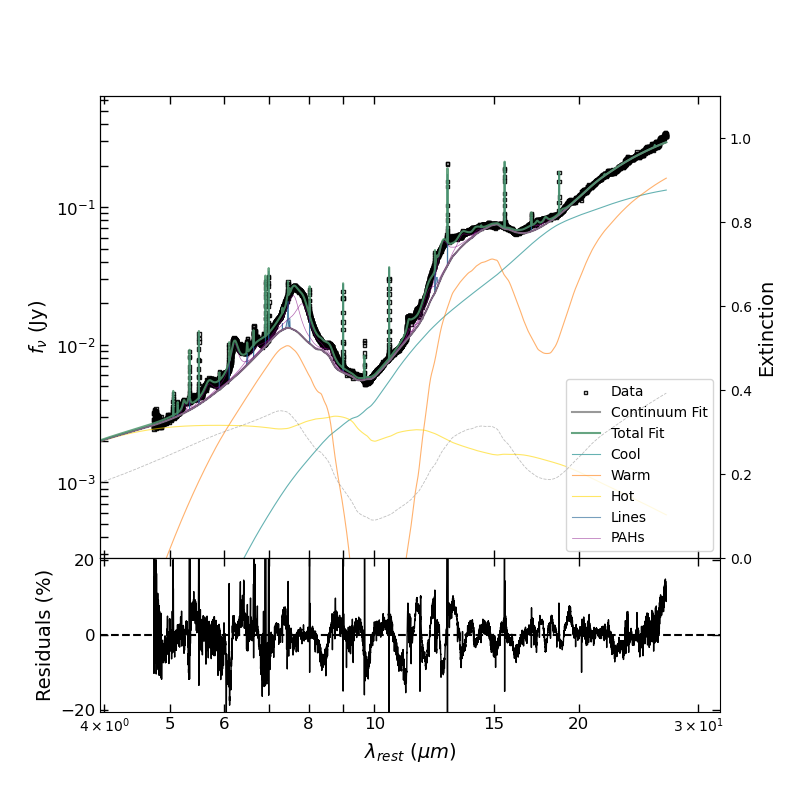

In [9]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [13]:
# Load the parameter cube from drive
parcube_fd = '../CAFE/output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [14]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Load data: ../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
Filename: ../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (22873,)   float64   
  2  ERR           1 ImageHDU         7   (22873,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (22873,)   float64   
  4  ERR_ST        1 ImageHDU         7   (22873,)   float64   
  5  DQ            1 ImageHDU         7   (22873,)   float64   
  6  WAVE          1 ImageHDU         7   (22873,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   22873R x 1C   [20A]   


In [15]:
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 661)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 661)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 661)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 661)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 661)   float64   
  6  EXPR          1 BinTableHDU     13   661R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   661R x 2C   [I, 32A]   


In [16]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table
pah = cafeio.pah_table(s.parcube, 0, 0)
# Read output line table
line = cafeio.line_table(s.parcube, 0, 0)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_

6.2/7.7 = 0.15948781487926658 +/- 0.0031868275085701115
11.3/7.7 = 0.1088119424851446 +/- 0.003165629837104753
             pah_strength  pah_strength_unc
pah_complex                                
PAH113_C     1.662026e-19      1.188710e-20
PAH120       3.909301e-19      9.583194e-21
PAH126_C     1.227071e-18      1.686315e-20
PAH136       4.660945e-19      7.598355e-21
PAH142       1.058069e-19      6.443677e-21
PAH164       0.000000e+00      0.000000e+00
PAH170_C     8.027622e-19      2.300560e-20
PAH33        9.455213e-20      2.401250e-21
PAH62        2.436064e-19      4.806904e-21
PAH77_C      1.527430e-18      4.073222e-20
PAH83        0.000000e+00      0.000000e+00
PAH86        1.908567e-20      5.671144e-21
ali34        9.270681e-21      2.196371e-21
ali345       2.194231e-20      3.405685e-21
